In [98]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
from mpl_toolkits.mplot3d import Axes3D

### preliminary


In [100]:
x=[0,1,2,3]
kx=np.fft.fft(x)
print(x, kx)

[0, 1, 2, 3] [ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]


### constant delta on the grid transform

In [101]:
spacing = 0.5

x = np.arange(-10,10,spacing)
y = np.arange(-10,10,spacing)
z = np.arange(-10,10,spacing)

X, Y, Z = np.meshgrid(x, y, z)


Text(0.5, 0.92, 'congifuration space')

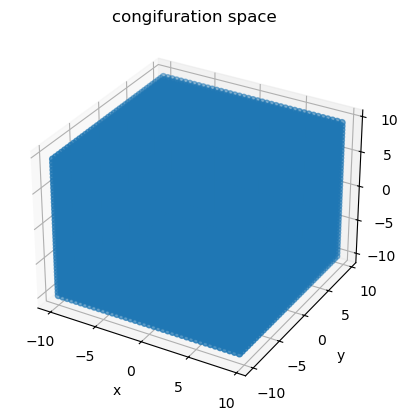

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('congifuration space')

In [103]:
grid = np.array([X,Y,Z])
print(grid.shape)

(3, 40, 40, 40)


In [104]:
kx = np.fft.fftfreq(len(x), spacing)
ky = np.fft.fftfreq(len(y), spacing)
kz = np.fft.fftfreq(len(z), spacing)

print(kx.shape, ky.shape, kz.shape)

kxs, kys, kzs = np.meshgrid(kx,ky,kz)

print(kxs.shape, kys.shape, kzs.shape)

(40,) (40,) (40,)
(40, 40, 40) (40, 40, 40) (40, 40, 40)


Text(0.5, 0.92, 'fourier space')

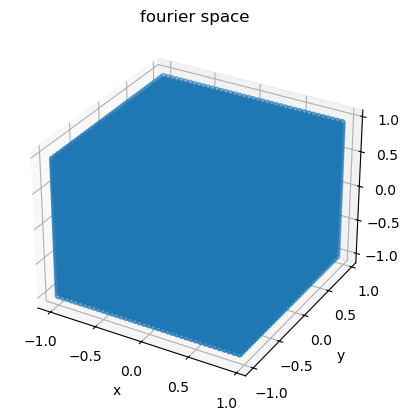

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kxs,kys,kzs)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('fourier space')

(40, 40, 40)


Text(0.5, 0.92, 'delta in config space')

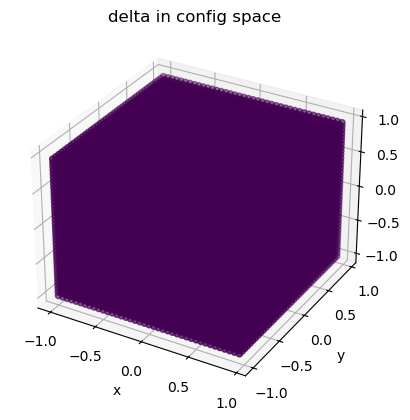

In [106]:
delta = np.full_like(X, 1)
print(delta.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kxs,kys,kzs, c=delta)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('delta in config space')

(40, 40, 40)


/Users/edoardo/miniconda3/envs/acc-env/lib/python3.9/site-packages/matplotlib/axes/_axes.py:4458: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


Text(0.5, 0.92, 'delta in fourier space')

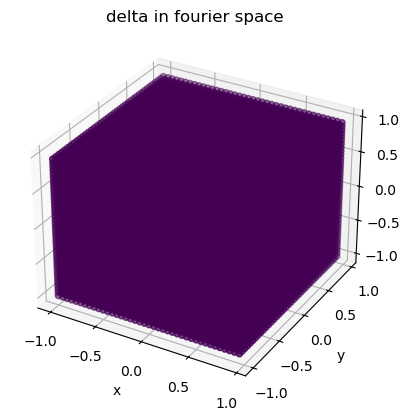

In [107]:
delta_transform = np.fft.fftn(delta)
print(delta.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kxs,kys,kzs, c=delta_transform)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('delta in fourier space')

Remember that $\mathcal{F}[const]=\delta_D (0)$

In [108]:
## computing P(k)=delta delta
Pk =np.abs(delta_transform)**2
print(Pk.shape)

(40, 40, 40)


In [109]:
## computing norm of the wavevectors

k_norm = np.sqrt(np.abs(kxs)**2+np.abs(kys)**2+np.abs(kzs)**2)
print(k_norm.shape)

(40, 40, 40)


Now I need to bin P(k): consider each value of P(k), compute abs(k) of the k you're considering and put the value of P(k) in that k in the corrisponding bin

In [110]:
kN = 2 * np.pi / spacing                    # max frequency based on spacing
kF = 2 * np.pi / (x[-1]-x[0])               # min frequency based on side length

print(kN, kF)

# Define the edges for the frequency range
edges = np.arange(kF - 1e-6, kN, 3 * kF)    # Edges of the bins in abs(k)
pk_meas = np.zeros(len(edges) - 1)          # Array to store measurements
k_bin = np.zeros(len(edges) - 1)            # Array to store frequency bins

print(edges)

12.566370614359172 0.32221463113741466
[ 0.32221363  1.28885752  2.25550142  3.22214531  4.1887892   5.1554331
  6.12207699  7.08872089  8.05536478  9.02200867  9.98865257 10.95529646
 11.92194035]


In [111]:
Pk_hist = np.histogram(Pk, edges)

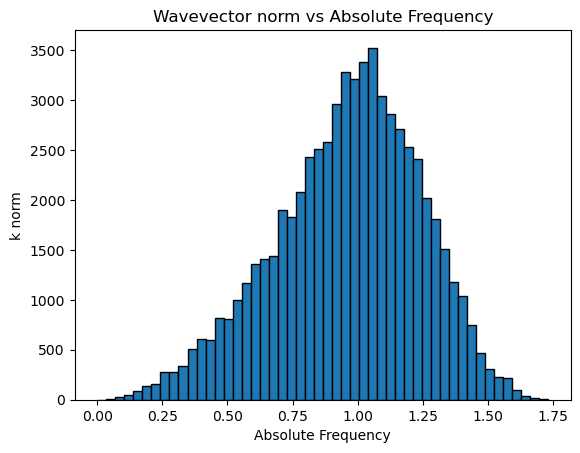

In [117]:
# Plot the histogram
plt.hist(k_norm.flatten(), bins=50, edgecolor='black')
plt.xlabel('Absolute Frequency')
plt.ylabel('k norm')
plt.title('Wavevector norm vs Absolute Frequency')
plt.show()

In [118]:
## find the bin to which P(k) belongs to
for i in range(len(edges) - 1):
    ww = np.where((k_norm.flatten() > edges[i]) & (k_norm.flatten() < edges[i + 1]))[0]
    ## Now, the ww variable contains the indices of elements in the k_norm array 
    ## that fall within the current frequency bin
    k_bin [i] = np.mean(k_norm.flatten()[ww])
    pk_meas[i] = np.mean(Pk.flatten()[ww])

In [119]:
print(pk_meas)

[2.97691545e-29 0.00000000e+00            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan]
